# Lab | Matplotlib & Seaborn

#### Import all the libraries that are necessary.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Data

In [4]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots.

Also, play around with the linewidth and style. Use the ones you're most happy with.

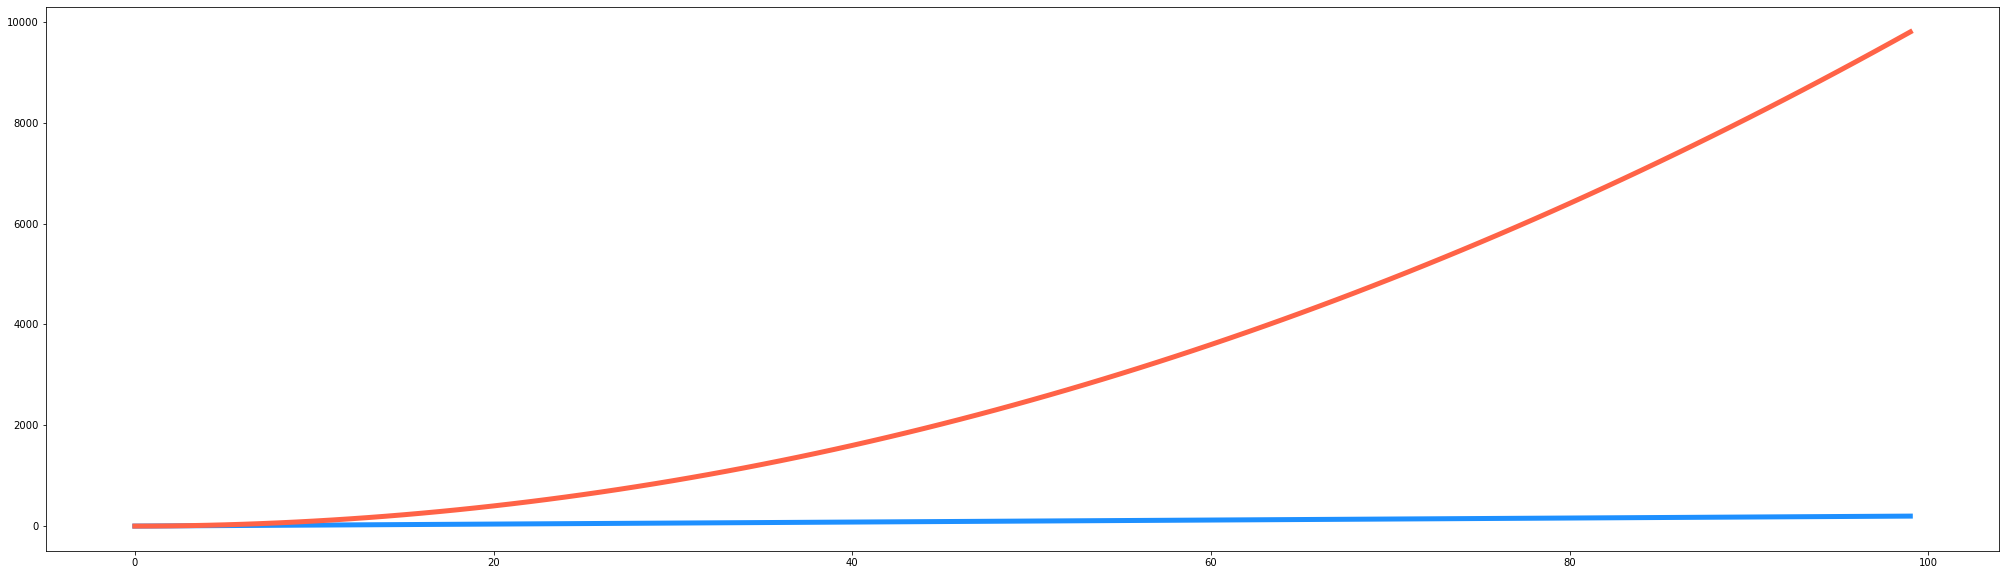

In [5]:
# OPTION 1
# Create a figure of a fixed size
plt.figure(figsize=(35,10))

# First plot
plt.plot(x, y, 'dodgerblue', lw = 5)

# Second plot
plt.plot(x, z, color='tomato', lw = 5)

# Show the plot
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

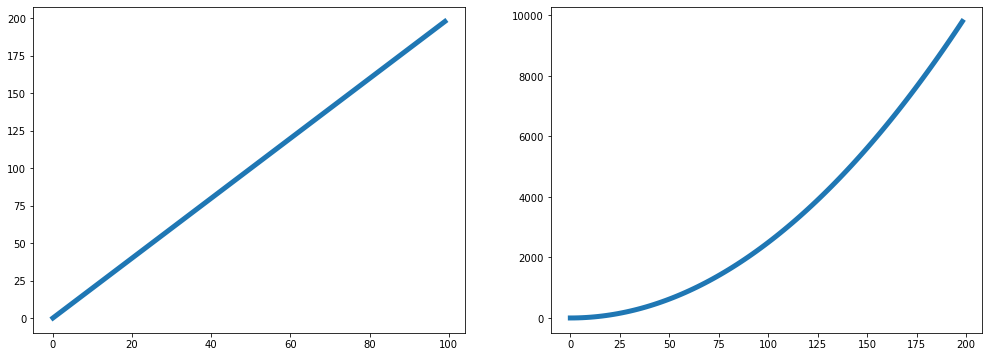

In [6]:
# OPTION 2

import sys

# Create a figure of a fixed size and axes
plt.subplots(figsize=(17,6))

# Plots
plt.subplot(1,2,1)
plt.plot(x,y, lw = 5)

plt.subplot(1,2,2)
plt.plot(y,z, lw = 5)

# Show the plot
plt.show()
#paolo: nice use of subplots

#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

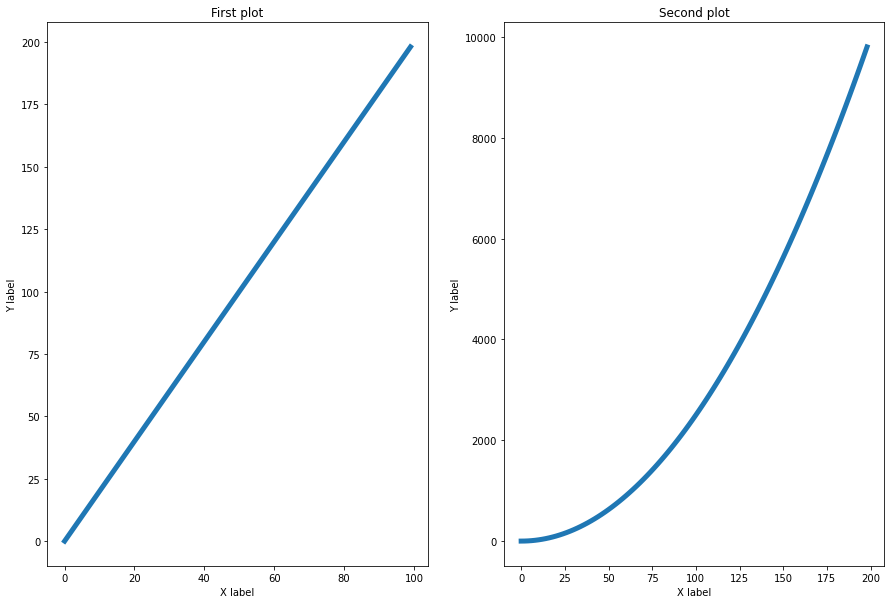

In [7]:
# ENHANCED VERSION to see more matplotlib features

# Variables
fs = 16 # fontsize
fw = 700 # fontweight
lw = 3 # lineweight
y_rot = 0 # ylabel rotation

# Create a figure of a fixed size and axes

plt.subplots(figsize=(15,10))

# First plot adding a title and x and y labels

plt.subplot(1,2,1)
plt.plot(x,y, lw = 5)
plt.xlabel('X label', fontsize = 10)
plt.ylabel('Y label', fontsize = 10)
plt.title('First plot')

# Second plot adding a title and x and y labels

plt.subplot(1,2,2)
plt.plot(y,z, lw = 5)
plt.xlabel('X label', fontsize = 10)
plt.ylabel('Y label', fontsize = 10)
plt.title('Second plot')

# Show the plot
plt.show()
#paolo: good playing with the plotting paramters


#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

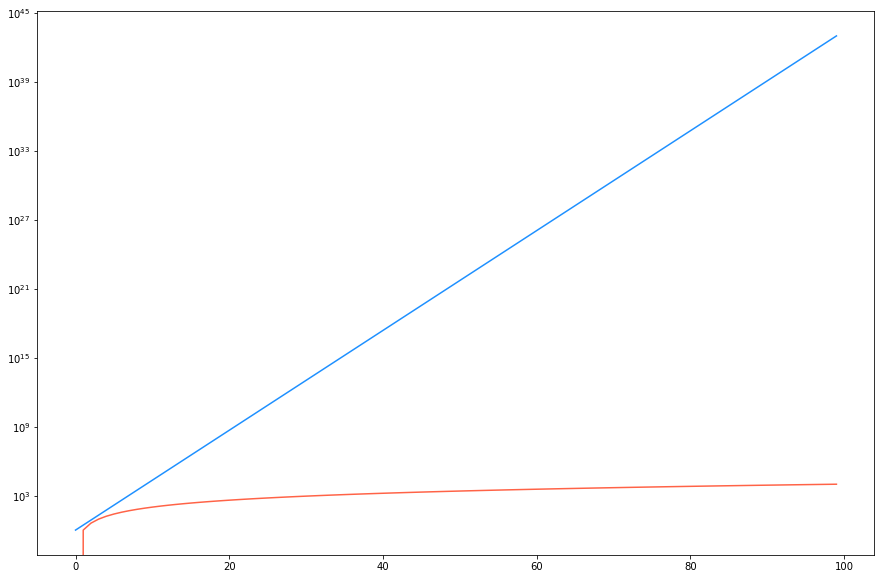

In [8]:
# Create a figure of a fixed size and axes
y = x**2
z = np.exp(x)
plt.figure(figsize=(15,10))

# Normal plot

plt.plot(y, color='tomato')
plt.plot(z, color='dodgerblue')

# Logarithmic scale

plt.yscale('log')

# Show plot
plt.show()
#paolo: this is a log scale - could you plot both also 
# on a normal scale

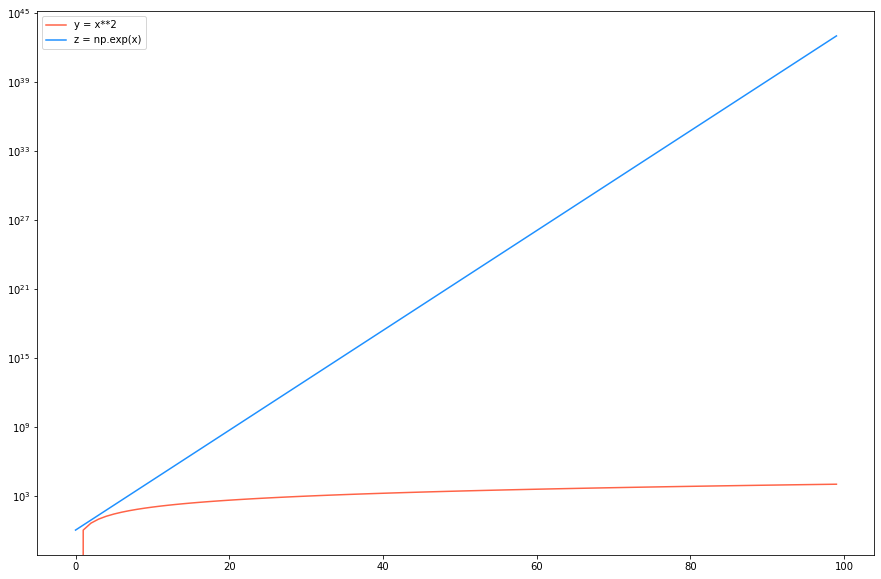

In [9]:
# ALTERNATIVE WITH LEGEND

# Create a figure of a fixed size and axes

plt.figure(figsize=(15,10))

# Normal plot

plt.plot(y, color='tomato', label = 'y = x**2')
plt.plot(z, color='dodgerblue', label = 'z = np.exp(x)')

# Logarithmic scale

plt.yscale('log')

# Show plot
plt.legend()
plt.show()

# Challenge 2

Import the Fitbit2.csv file and name your dataset fitbit. Download the data from [here](https://drive.google.com/file/d/17TW-w-izKuR7bLoa0Mnyp9YN9zEQNXq-/view?usp=sharing) and place it in the data folder. Access it through a relative path.

In [18]:
# Read the data
df = pd.read_csv('./data/Fitbit2.csv')
df.head()
#paolo: this cell gives error, could you use relative paths?

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month.
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.

Hints:

- Use Months_encoded and Week_or Weekend columns.
- Use matplolib.pyplot object oriented API.
- Set your size figure to 12,4
- Explore plt.sca
- Explore plt.xticks
- Save your figures

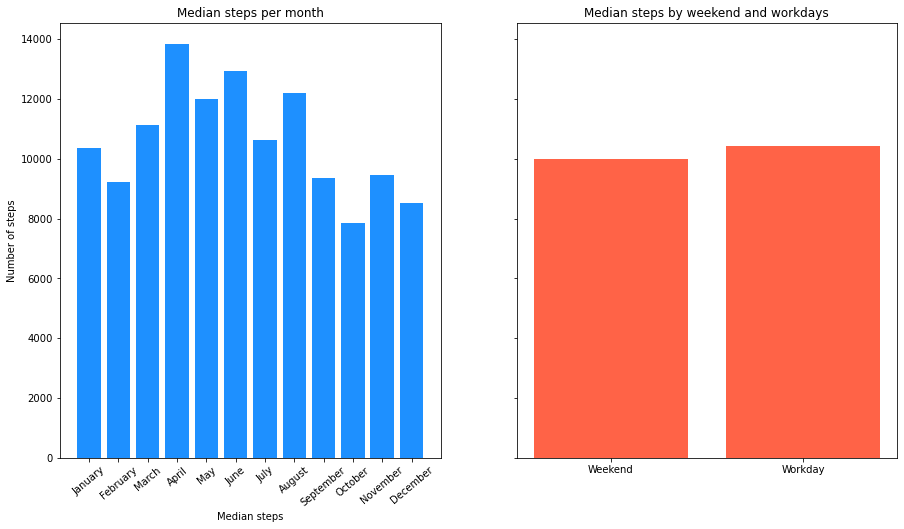

In [19]:
import pandas as pd 
import calendar
# MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month
dfmedian = df.groupby(df['Months_encoded']).median()
x1 = np.arange(0,12,1)
y1 = dfmedian['Steps']


# Find the median steps for workdays and weekdays
dfworkmedian = df.groupby(df['Work_or_Weekend']).median()
x2 = np.arange(0,2)
y2 = dfworkmedian['Steps']

# Create a figure of a fixed size and axes
fig, ax = plt.subplots(1, 2, figsize=(15,8), sharex=False, sharey=True)

# Set the current axes instance to ax[0] - Now plt methods will affect ax[0]
plt.sca(ax[0])

# Plot the weekday steps in the current axes
plt.bar(x1, y1, color ='dodgerblue', lw = 5)

# Add labels, title, etc
plt.xlabel('Median steps', fontsize = 10)
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=40)
plt.ylabel('Number of steps', fontsize = 10)
plt.title('Median steps per month')

# Save the figure


# MEDIAN STEPS BY WORK_OR_WEEKEND
# Set the current axes instance to ax[1] - Now plt methods will affect ax[1]
plt.sca(ax[1])
plt.bar(x2, y2, color='tomato', lw =5)


# Plot the workday and weekend steps in the current axes
plt.xticks(np.arange(2), ('Weekend', 'Workday'))
plt.title('Median steps by weekend and workdays')

# Add labels, title, etc


# Save the figure
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

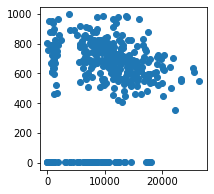

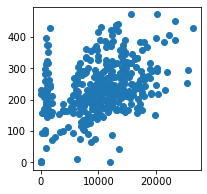

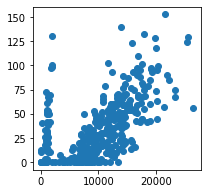

In [20]:
# ALTERNATIVE 1
# Create a df with the columns we are interested in 
df_new = df[['Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Very Active']]

# Iterate to draw each scatter plot
for i in df_new:
    fig, ax = plt.subplots(figsize=(3,3))
    x = df[['Steps']]
    plt.scatter(x, df_new[i])
plt.show()

In [21]:
# ALTERNATIVE 2
# Create a df with the columns we are interested in 


# Create a figure of a fixed size and axes


# Iterate to draw each scatter plot
